In [ ]:
!pip install google_play_scraper


     |████████████████████████████████| 51kB 2.9MB/s 
  Created wheel for google-play-scraper: filename=google_play_scraper-0.1.2-cp37-none-any.whl size=22280 sha256=4565df3da12e4682e4d155bbd7a3cb32a469d78c8eb34ad736d71b5c183af21a
  Stored in directory: /root/.cache/pip/wheels/c3/0c/dc/847f7da787b7d2c28b26a5062f86eac3f16a8cb0bdfdc1f308
Successfully built google-play-scraper


In [ ]:

import json
import pandas as pd
# tqdm?
from tqdm import tqdm
# seaborn
import seaborn as sns
import matplotlib.pyplot as plt
# pygments
from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter
from google_play_scraper import Sort, reviews, app
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

In [ ]:
app_packages = [
  'com.anydo',
  'com.todoist',
  'com.ticktick.task',
  'com.habitrpg.android.habitica',
  'cc.forestapp',
  'com.oristats.habitbull',
  'com.levor.liferpgtasks',
  'com.habitnow',
  'com.microsoft.todos',
  'prox.lab.calclock',
  'com.gmail.jmartindev.timetune',
  'com.artfulagenda.app',
  'com.tasks.android',
  'com.appgenix.bizcal',
  'com.appxy.planner'
]
len(app_packages)

15

In [ ]:

app_infos = []
for ap in tqdm(app_packages):
  info = app(ap, lang='en', country='us')
  del info['comments']
  app_infos.append(info)

100%|██████████| 15/15 [00:03<00:00,  4.81it/s]


In [ ]:
def print_json(json_object):
  json_str = json.dumps(
    json_object,
    indent=2,
    sort_keys=True,
    default=str
  )
  print(json_str, JsonLexer(), TerminalFormatter())

第一个APP信息

In [ ]:
print_json(app_infos[0])

{
  "adSupported": null,
  "androidVersion": "Varies",
  "androidVersionText": "Varies with device",
  "appId": "com.anydo",
  "containsAds": false,
  "contentRating": "Everyone",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "\ud83e\udd47 <b>\"#1 to do list app out there\u201d</b> - WSJ\r\n\ud83c\udfc6 <b>Editor's Choice</b> by Google\r\n\r\nOver 30M people rely on Any.do to stay organized and get more done.\r\nIt's a simple to do list app with reminders, planner & calendar - all in one.\r\n\r\n<b>\ud83e\udd47 \"A MUST HAVE APP\" (Lifehacker, NYTimes, USA TODAY).</b>\r\n\r\nAny.do is a free to-do list, planner & calendar app for managing and organizing your daily tasks, to-do lists, notes, reminders, checklists, calendar events, grocery lists and more.\r\n\r\n\ud83d\udcc5 Organize your tasks & to-do list\r\n\r\n\u2022 ADVANCED CALENDAR & DAILY PLANNER - Keep your to-do list and calendar events always at hand with our calendar widget. Any.do to-do list & pla

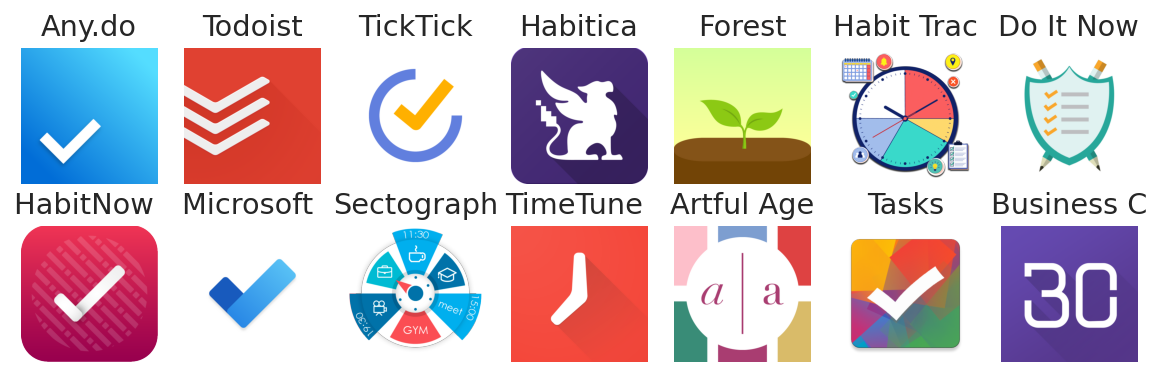

In [ ]:
def format_title(title):
    spe_index = title.find(':') if title.find(':') != -1 else title.find('-')
    if spe_index != -1:
        title = title[:spe_index]
    return title[:10]


fig, axs =plt.subplots(2, len(app_infos) // 2, figsize = (10,3))

for i,ax in enumerate(axs.flat):
    ai = app_infos[i]
    img = plt.imread(ai['icon'])
    ax.imshow(img)
    ax.set_title(format_title(ai['title'][:10]))
    ax.axis('off')

In [ ]:
app_infos_df = pd.DataFrame(app_infos)
app_infos_df.head(n=2)

,title,description,descriptionHTML,summary,summaryHTML,installs,minInstalls,score,ratings,reviews,histogram,price,free,currency,sale,saleTime,originalPrice,saleText,offersIAP,inAppProductPrice,size,androidVersion,androidVersionText,developer,developerId,developerEmail,developerWebsite,developerAddress,privacyPolicy,developerInternalID,genre,genreId,icon,headerImage,screenshots,video,videoImage,contentRating,contentRatingDescription,adSupported,containsAds,released,updated,version,recentChanges,recentChangesHTML,editorsChoice,appId,url
0,"Any.do: To do list, Task, Reminders & Planner","🥇 <b>""#1 to do list app out there”</b> - WSJ\r...",🥇 <b>&quot;#1 to do list app out there”</b> - ...,To-do list & Tasks ✅ Calendar 📅ֿ Reminder 🔔 ...,To-do list &amp; Tasks ✅ Calendar 📅ֿ Reminde...,"10,000,000+",10000000,4.350583,364432,129039,"[33068, 11079, 18279, 34598, 267408]",0,True,USD,False,None,None,None,True,$0.99 - $83.88 per item,Varies with device,Varies,Varies with device,Any.do To-do list & Calendar,5304780265295461149,feedback+androidtodo@any.do,https://www.any.do,"Any.do Inc.\n\n6 Agripas Street, Tel Aviv\n62...",https://www.any.do/privacy,5304780265295461149,Productivity,PRODUCTIVITY,https://play-lh.googleusercontent.com/zgOLUXCH...,https://play-lh.googleusercontent.com/umhDP6ph...,[https://play-lh.googleusercontent.com/cGoZDZR...,None,None,Everyone,None,None,False,"Nov 10, 2011",1614496999,Varies with device,"- Dark mode is finally here, hooray! \r\n- Rec...","- Dark mode is finally here, hooray! <br>- Rec...",False,com.anydo,https://play.google.com/store/apps/details?id=...
1,"Todoist: To-Do List, Tasks & Reminders","🏆 <b>2020 Editor's Choice</b> by Google\r\n🥇 ""...",🏆 <b>2020 Editor&#39;s Choice</b> by Google<br...,"""The best to-do list"" — The Verge. Tasks ✅ Rem...",&quot;The best to-do list&quot; — The Verge. T...,"10,000,000+",10000000,4.555999,219973,66830,"[8864, 3613, 7726, 35917, 163853]",0,True,USD,False,None,None,None,True,$0.99 - $36.00 per item,Varies with device,Varies,Varies with device,Doist,6748661820728732000,support@todoist.com,http://todoist.com,"Doist\n201 Mission Street, Suite 1200\nSan Fra...",https://todoist.com/Help/viewPrivacyPolicy,6748661820728732000,Productivity,PRODUCTIVITY,https://play-lh.googleusercontent.com/GK0SwEBV...,https://play-lh.googleusercontent.com/sAjzU1fU...,[https://play-lh.googleusercontent.com/cealfl9...,None,None,Everyone,None,None,False,"Nov 18, 2012",1614609241,Varies with device,⭐️ Personalize your mobile icon\r\nMake Todois...,⭐️ Personalize your mobile icon<br>Make Todois...,True,com.todoist,https://play.google.com/store/apps/details?id=...


In [ ]:
app_infos_df.to_csv('apps.csv', index=None, header=True)

In [ ]:
app_reviews =[]

In [ ]:
for ap in tqdm(app_packages):
  for score in list(range(1, 6)):
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
      rvs, _ = reviews(
        ap,
        lang='en',
        country='us',
        sort=sort_order,
        count= 200 if score == 3 else 100,
        filter_score_with=score
      )
      for r in rvs:
        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
        r['appId'] = ap
      app_reviews.extend(rvs)

100%|██████████| 15/15 [01:03<00:00,  4.25s/it]


In [ ]:
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.head(n =2)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEdg6yUOvcZHEm6vmnCD7vXQW7wuauIJaKhKtw...,Uchihasocksy,https://play-lh.googleusercontent.com/-jhjI7vI...,Was simply looking for a widget that could syn...,1,0,5.10.0.8,2021-03-05 00:37:04,Any.do’s Calendar Integration syncs events to ...,2021-03-07 10:03:08,most_relevant,com.anydo
1,gp:AOqpTOHTeNGxl9Zhlz-BM6ybraEsnVg0BLDubF8E_fQ...,kelvin ho,https://play-lh.googleusercontent.com/-rSnBD4Y...,Very very bad experience with the management! ...,1,5,5.10.0.8,2021-02-26 04:17:49,"Hi Kelvin, we've checked our records and could...",2021-02-28 09:36:51,most_relevant,com.anydo


In [ ]:
app_reviews_df.to_csv('app_reviews.csv',index= None, header=True)

In [ ]:
app_reviews_df.shape

(16460, 12)

In [ ]:
!pip install transformers

     |████████████████████████████████| 1.9MB 4.3MB/s 
     |████████████████████████████████| 3.2MB 17.0MB/s 
     |████████████████████████████████| 890kB 36.6MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=6cf9e2f9ab248c287bc3bd3b7ed0c8379339fdf714aa865c216ed6f7cd069699
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
import transformers
from sklearn.model_selection import train_test_split
import torch
from torch import nn, optim
from torch.utils import data

In [ ]:
df = pd.read_csv('app_reviews.csv')
df.head(n = 2)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEdg6yUOvcZHEm6vmnCD7vXQW7wuauIJaKhKtw...,Uchihasocksy,https://play-lh.googleusercontent.com/-jhjI7vI...,Was simply looking for a widget that could syn...,1,0,5.10.0.8,2021-03-05 00:37:04,Any.do’s Calendar Integration syncs events to ...,2021-03-07 10:03:08,most_relevant,com.anydo
1,gp:AOqpTOHTeNGxl9Zhlz-BM6ybraEsnVg0BLDubF8E_fQ...,kelvin ho,https://play-lh.googleusercontent.com/-rSnBD4Y...,Very very bad experience with the management! ...,1,5,5.10.0.8,2021-02-26 04:17:49,"Hi Kelvin, we've checked our records and could...",2021-02-28 09:36:51,most_relevant,com.anydo


In [ ]:
df.shape

(16460, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16460 entries, 0 to 16459
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              16460 non-null  object
 1   userName              16460 non-null  object
 2   userImage             16460 non-null  object
 3   content               16459 non-null  object
 4   score                 16460 non-null  int64 
 5   thumbsUpCount         16460 non-null  int64 
 6   reviewCreatedVersion  14042 non-null  object
 7   at                    16460 non-null  object
 8   replyContent          8362 non-null   object
 9   repliedAt             8362 non-null   object
 10  sortOrder             16460 non-null  object
 11  appId                 16460 non-null  object
dtypes: int64(2), object(10)
memory usage: 1.5+ MB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'review score')

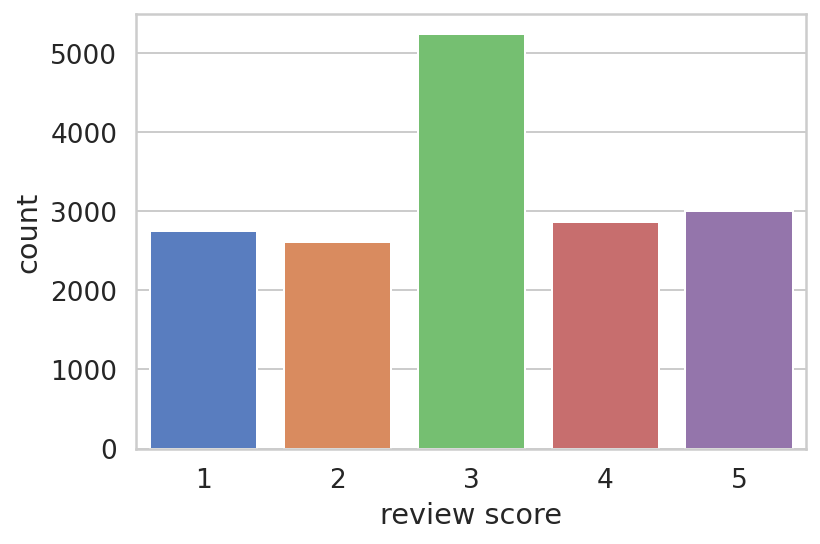

In [ ]:
sns.countplot(df.score)
plt.xlabel('review score')

In [ ]:
def to_sentiment(rating):
  rating= int(rating)
  if rating <=2:
    return 0
  elif rating == 3:
    return 1
  else:
    return 2 

In [ ]:
df['sentiment'] = df.score.apply(to_sentiment)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'neg'), Text(0, 0, 'nur'), Text(0, 0, 'pos')]

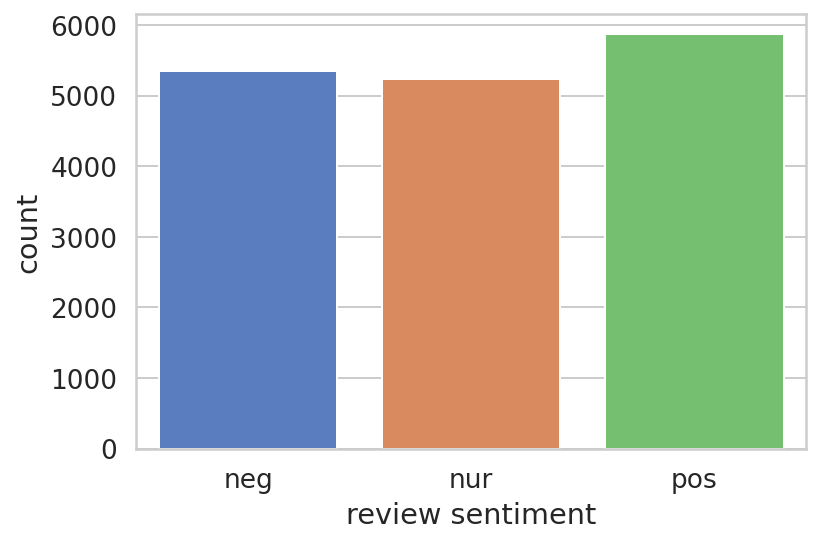

In [ ]:
ax = sns.countplot(df.sentiment)
plt.xlabel('review sentiment')
ax.set_xticklabels(['neg', 'nur','pos'])

# Data Preprocess

In [ ]:
tokenizer = transformers.BertTokenizer.from_pretrained("bert-base-uncased")

In [ ]:
sample_text = "when was I last outside? I am stuck at home for 2 weeks ."

In [ ]:
tokens = tokenizer.tokenize(sample_text)
print(tokens)

['when', 'was', 'i', 'last', 'outside', '?', 'i', 'am', 'stuck', 'at', 'home', 'for', '2', 'weeks', '.']


In [ ]:
ids = tokenizer.convert_tokens_to_ids(tokens)
print(ids)

[2043, 2001, 1045, 2197, 2648, 1029, 1045, 2572, 5881, 2012, 2188, 2005, 1016, 3134, 1012]


# Specical Tokens

In [ ]:
tokenizer.sep_token, tokenizer.sep_token_id

('[SEP]', 102)

In [ ]:
tokenizer.cls_token, tokenizer.cls_token_id

('[CLS]', 101)

In [ ]:
tokenizer.pad_token, tokenizer.pad_token_id

('[PAD]', 0)

In [ ]:
tokenizer.unk_token, tokenizer.unk_token_id

('[UNK]', 100)

In [ ]:
encoding = tokenizer.encode_plus(
    sample_text,
    max_length = 2,
    add_special_tokens = True,
    pad_to_max_length = True,
    return_attention_mask = True,
    return_token_type_ids = False,
    return_tensors='pt'
) 

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2155: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
encoding['input_ids']

tensor([[101, 102]])

In [ ]:
len(encoding['input_ids'][0])

2

In [ ]:
encoding['attention_mask']

tensor([[1, 1]])

In [ ]:
len(encoding['attention_mask'][0])

2

# choosing Sequence Length

In [ ]:
,
      add_special_token = True,
      pad_to_max_length = True,
      return_attention_mask = True,
      return_token_type_ids = False,
      retuen_tensors='pt'

In [ ]:
type(df.iloc[6899]['content'])
# df = df.drop(axis=0, labels=6899)
type(df.iloc[6898]['content'])
# df = df.drop(axis=0, labels=df.index[6897:6900])

In [ ]:
token_lens = []
for txt in df.content:
  tokens = tokenizer.encode(
      txt,
      max_length= 512,
      add_special_tokens = True,
      )
  token_lens.append(len(tokens))

In [ ]:
class GPReviewDatast(data.DataLoader):
  def __int__ (self, review, target, tokenizer, max_len):
    self.review = review
    self.target = target
    self.tokenizer = tokenizer
    self.max_len = max_len
  
  def __getItem__(self, index):
    review = str(self.review[item])
    
    encoding = tokenzier.encode_plus(
      self.review,
      add_special_token = True,
      pad_to_max_length = True,
      return_attention_mask = True,
      return_token_type_ids = False,
      retuen_tensors='pt'
    )
    return {
        'input_ids': encoding['input_ids'],
        'input_mask': encoding['input_mask'],
        'target': torch.tensor(self.target[item], dtype=torch.long)
        
    }

  def __len__():
    return len(self.target)

In [ ]:
MAX_LEN = 128
BATCH_SIZE = 8
EPOCHS = 20

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state = 1)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state = 1)

In [ ]:
def creat_data_loader(df, tokenizer, max_len, batch_size):
  ds = GPReviewDatast(
      review = df.content.to_numpy(),
      target= df.sentiment.to_numpy(),
      tokenizer= tokenizer,
      max_len = max_len
  )
  return data.DataLoader(
      ds,
      batch_size = batch_size,
      num_worker =4
  )

In [ ]:
train_data_loader = creat_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)

TypeError: ignored